1. [Gradient Boosting](#gradient-boosting)

#### Gradient Boosting:
- it a type of ensemble technique, were it connects the decision trees in series
- consider a dataset with 3 features and 1 continuous target variable

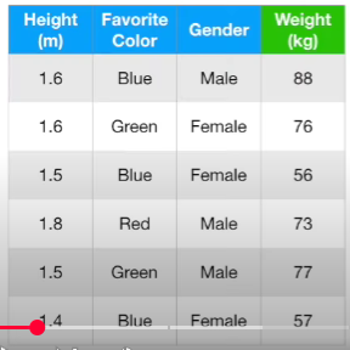

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_class.png')
new_image = img.resize((350, 350))
display(new_image)

- now, we need to calculate the constant for base model i.e. for regression, take average of the output target variable, which is to be considered as the output of the base model
- Mathematically,
    - Since, it a regression problem, we consider the below loss function

Note:
- the value 1/2 instead of 1/N or 1/2N is considered for mathematically convenience

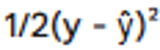

In [23]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/loss_function.png')
new_image = img.resize((160, 50))
display(new_image)

- first substitute the actual value 
    - 1/2 * (88-y^)^2 + 1/2 * (76-y^)^2 + 1/2 * (56-y^)^2 + 1/2 * (73-y^)^2 + 1/2 * (77-y^)^2 + 1/2 * (57-y^)^2
- now, we take the first order derivative of the above loss function (subsituted) w.r.t y^
    - y^ = 71.16 = 71.2

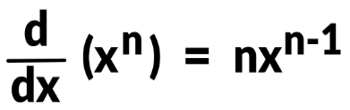

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/derivation.png')
new_image = img.resize((350, 110))
display(new_image)

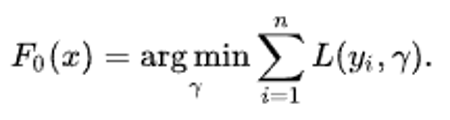

In [20]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/constant.png')
new_image = img.resize((450, 120))
display(new_image)

- now, we compute the pseudo residuals
    - calculating the residuals (R1) between the actual prediction and the output value of the base learner i.e. 71.2

Note:
- Residuals:
    - Loss function: 1/2(y-y^)^2
    - while taking first order derivative for Loss function = y-y^

- Pseudo Residuals:
    - loss function: (y-y^)^2
    - while taking the first order derivative for Loss function = 2(y-y^) i.e. Rim

- Mathematically, 
    - we calculate the pseudo residuals (R1) by taking the derivative of the Loss function as shown below which results in 
        - (y-y^)

Note:
- the value 'm' in the below formula represent the model number

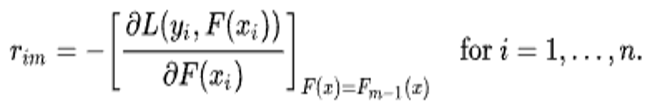

In [11]:

from PIL import Image 
from IPython.display import display

img = Image.open('images/pseudo_residuals.png')
new_image = img.resize((650, 110))
display(new_image)

- since the output of the above formula would be for the first sample record,
    - y-y^ = y - Fm-1(x) = y - F0(x) = y - 71.2 = 88 - 71.2 => 16.8 
        - y^ = output of 1st base model = F0(x) = 71.2
    - likewise, we calculate for all the samples of the dataset

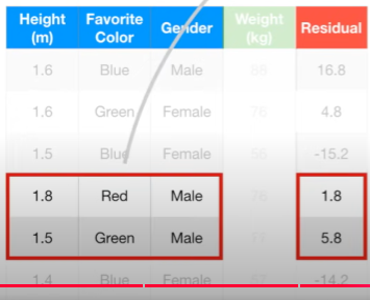

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/untuned_residual_r1.png')
new_image = img.resize((370, 300))
display(new_image)

- now, we create a dataset with input features along with the calculated residuals (R1) as the target variable for the second learner (Decision Tree)
- now, we build the decision tree with the below consideration
    - first we need limit the leaf nodes for the tree i.e. mostly between 8-32 but in our example we keep it as 4
    - i.e.
        - create terminal regions for the 4 leaf nodes (Rjm)
            - j => leaf number
            - m => model number

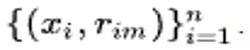

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residuals_output.png')
new_image = img.resize((250, 50))
display(new_image)

- While training:
    - As we feed the records one by one into the tree, we find few records follow the same path i.e. when we have more than 1 target values falling into the same leaf node as shown below

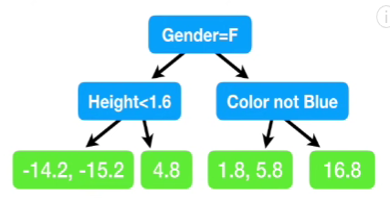

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/tree.png')
new_image = img.resize((390, 200))
display(new_image)

- we now calculate the γ value for the output of terminal regions (i.e. 4 leaf nodes)
- i.e. R11 -> γ11, R21 -> γ21, R31 -> γ31, R41 -> γ41

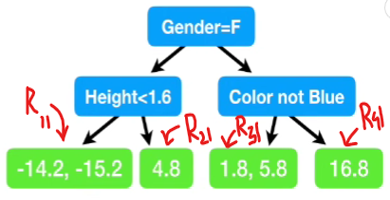

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/terminal.png')
new_image = img.resize((390, 200))
display(new_image)

- Mathematically,
    - using the below formula and taking the first order derivate for γ, we calculate the γ value for each record in the dataset

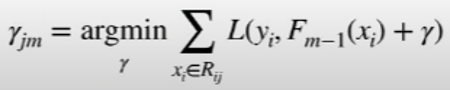

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/optimization.png')
new_image = img.resize((450, 90))
display(new_image)

- Evaluation:
    - γ is the output values associated with the terminal regions
    - Record 1:
        - γ4.1 = 1/2 * (88-(71.2+γ))^2 = 1/2 * (16.8-γ)^2 = 16.8-γ = 0 =>  16.8
    - Record 2:
        - γ2.1 = 1/2 * (76-(71.2+γ))^2 = 1/2 * (4.8-γ)^2 = 4.8-γ = 0 => γ = 4.8
    - Record 3:
        - γ1.1 = 1/2 * (56-(71.2+γ))^2 = 1/2 * (15.2+γ)^2 = 15.2+γ = 0 => γ = -15.2
    - Record 4:
        - γ3.1 = 1/2 * (73-(71.2+γ))^2 = 1/2 * (1.8-γ)^2 = 1.8-γ = 0 => γ = 1.8
    - Record 5:
        - γ3.1 = 1/2 * (77-(71.2+γ))^2 = 1/2 * (5.8-γ)^2 = 5.8-γ = 0 => γ = 5.8
    - Record 6:
        - γ1.1 = 1/2 * (57-(71.2+γ))^2 = 1/2 * (14.2+γ)^2 = 14.2+γ = 0 => γ = -14.2

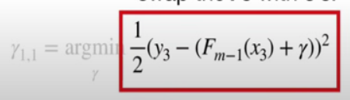

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/gamma.png')
new_image = img.resize((350, 100))
display(new_image)

- Calculate the γ values for R11, R21, R31, R41 by averaging the values associated:
    - γ1.1 for R11 (Records-6, Record-3) => (-14.2-15.2)/2 => -13.7
    - γ2.1 for R21 (Record-2) = 4.8 => -13.7
    - γ3.1 for R31 (Record-4, Record-5) = (1.8+5.8)/2 => 3.8
    - γ4.1 for R41 (Record-1) => 16.8
- now, we update the tree with the updated γ values for the terminal regions

Note:
- if, we have more than 1 sample in the leaf node for terminal regions calculations then, we take the average of the target values (pseudo residuals) associated

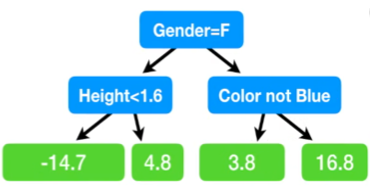

In [35]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/updated_tree.png')
new_image = img.resize((370, 190))
display(new_image)

- Prediction:
    - Now the output values of the records in the dataset for Decision Tree will be the values calculated i.e. associated with terminal regions
    - the predicted values will be interms of the residuals
    - to obtain the actual prediction
        - add average weight + the output prediction (residual value) from the Decision Tree
            - Actual Value = 88
            - Predicted Value = 88 (or sometimes closer to 88 which is due to overfitting)

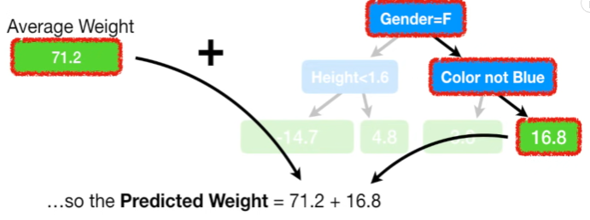

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/prediction.png')
new_image = img.resize((590, 220))
display(new_image)

- we add learning rate to prevent overfitting of the tree
- "v" nu is the learning rate which range between 0-1 as shown below

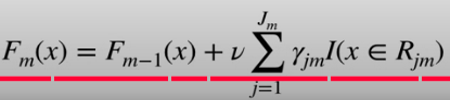

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/update_model.png')
new_image = img.resize((450, 100))
display(new_image)

- Image shown below, the prediction of Decision Tree (residuals R2)

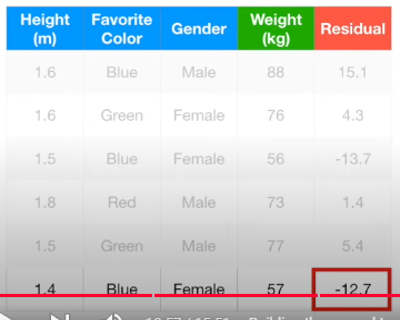

In [24]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/output_decision_tree.png')
new_image = img.resize((400, 320))
display(new_image)

- likewise, now we built the second Decision Tree which predicts the output residual (R3) based on the residuals (R2) given as target variable to the second model Decision Tree
- we repeat these steps until the number of trees is built (number of trees decided manually or via hyperparameter tuning)
- Important saying: taking small steps in the right direction gives us the better predictions